<a href="https://colab.research.google.com/github/giovannipolimi/GenerativeAI/blob/main/Copia_di_Elastic_GenAI_Meetup_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Elastic GenAI Meetup in Milan** - Lab
## Chat with your private data using ES + LangChain


A brief lab that shows how to use Elasticsearch as vector storage database with [LangChain](https://www.langchain.com/) and how to query documents stored in Elasticsearch using natural language thanks to [ChatGPT](https://chat.openai.com/). This approach is called Retrieval-Augmented Generation (RAG).

For more information: https://www.elastic.co/search-labs/retrieval-augmented-generation-rag

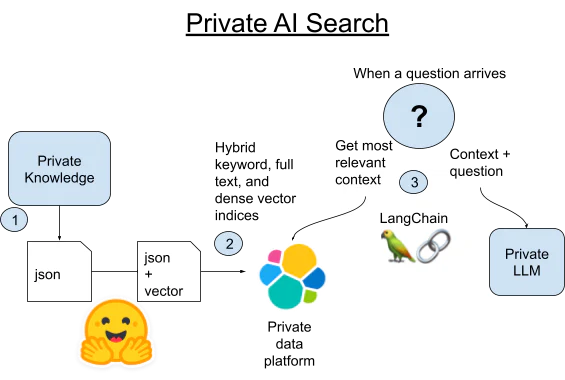

# Requirements
To execute this lab you need an [API key from OpenAI](https://help.openai.com/en/articles/4936850-where-do-i-find-my-api-key) and an Elasticsearch instance running on [Elastic Cloud](https://www.elastic.co/guide/en/cloud/current/ec-api-keys.html). Is it possible also to use an on-premise Elasticsearch installation but this will require some configuration changes in the `ElasticsearchStore` Python object (see code below).

## .env

You need to upload a `.env` file with the following contents:
```
OPENAI_API_KEY =
ELASTICSEARCH_URL =
ELASTIC_API_KEY =
```
where you need to insert the API keys and the Elasticsearch URL.

## Ai_act.pdf

You need also the Artificial Intellingence ACT PDF document that can download [here](https://www.europarl.europa.eu/RegData/etudes/BRIE/2021/698792/EPRS_BRI(2021)698792_EN.pdf) (the file must be renamed in `AI_act.pdf`). This is a PDF document that we'll use in the labs as private document to be stored in Elasticsearch and used as knowledge base for questions in natural language.


In [ ]:
!pip install python-dotenv elasticsearch openai langchain wikipedia tiktoken pypdf yt_dlp pydub librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.8 MB/s et

In [ ]:
import os, openai, langchain
from dotenv import load_dotenv

load_dotenv('.env') # Read the .env file

# Configure OpenAI client
openai.api_key = os.environ['OPENAI_API_KEY']

# Embeddings

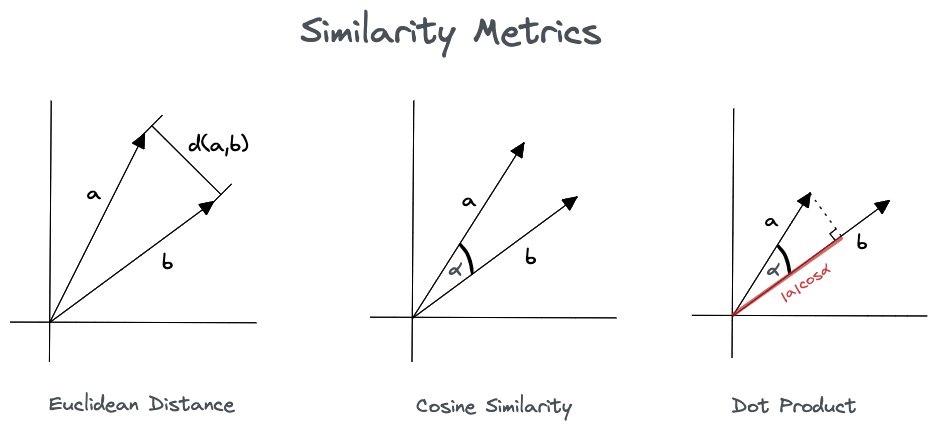

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings()

In [ ]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [ ]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

print(len(embedding1))
print(embedding1)

1536
[-0.02752467549204654, -0.005451274803928971, -0.02571915759208855, -0.033105367352157154, -0.0272721548156874, 0.02248690187538867, -0.01029018822497256, -0.008206898698606658, 0.0025094171199840087, -0.019822816283512932, 0.0006301162336248298, 0.02919130711313926, -0.005372361976151413, 0.0005993403285804568, 0.0003034185049832101, 0.014166369710610754, 0.030075126686428404, -0.0013959619116975202, 0.004157109830048188, -0.003996128387813609, -0.011716926041714454, 0.006969550923472811, 0.013017403520276777, -0.04701921545508616, -0.0022995098083463798, 0.00475368808858449, 0.01684308124317219, -0.00027954748401090606, -0.025807540108211034, -0.01627491111834805, 0.026615604037386005, 0.0029434358101153475, -0.015593107527352648, -0.02464594797719136, 0.005984722893375489, -0.014999685521157116, 0.009728331536152574, -0.011382337216559601, -0.004611645557378455, -0.01097199181596796, -0.016994592531400534, 0.011041434955400593, 0.00681803870392185, -0.022070244901438104, -0.002

In [ ]:
import numpy as np
print(np.dot(embedding1, embedding2))
print(np.dot(embedding1, embedding3))
print(np.dot(embedding2, embedding3))

0.9632045688110661
0.7710513181276818
0.7596465216663818


# Loading PDF document

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("AI_act.pdf")
docs = loader.load()
print(len(docs))

# Page
print(docs[0].metadata)
print(docs[0].page_content)

12
{'source': 'AI_act.pdf', 'page': 0}
BRIEFING   
EU Legislation in Progress  
 
EPRS | European Parliamentary Research Service  
Author: Tambiama Madiega; Graphic: Samy Chahri  
Members' Research Service 
PE 698.792 –  June 2023  
 EN 
Artificial intelligence act 
OVERVIEW  
The European Commission tabled a  proposal for an EU regulatory framework on a rtificial 
intelligence (A I) in April  2021. The draft AI a ct is the first ever attempt to enact a horizontal regulation 
for AI. The proposed legal framework focuses on the specific utilisation of AI systems and associated 
risks. The Commission proposes to establish a technology -neutral definition of AI systems in EU la w 
and to lay down a classification for AI systems with different requirements and obligations tailored 
on a ' risk-based approach '. Some AI systems presenting ' unacceptable ' risks would be prohibited. A  
wide range of ' high -risk' AI systems w ould be authorised , but subject to a set of requirements and 
ob

# Loading from Wikipedia

In [ ]:
from langchain.document_loaders import WikipediaLoader

# Load from Wikipedia
docs = WikipediaLoader(query="Milano", lang="it", load_max_docs=20).load()
print(len(docs))

# Page
docs[0].metadata
docs[0].page_content

10


'Milano (IPA: /miˈlano/ ; Milan in dialetto milanese, [miˈlɑ̃ː] o [miˈlãː]) è un comune italiano di 1 363 411 abitanti, capoluogo della regione Lombardia e dell\'omonima città metropolitana, centro di una delle più popolose aree metropolitane d\'Europa; è inoltre il secondo comune più popoloso d\'Italia (dopo Roma) e rientra tra le venti città più grandi dell\'intera Europa.\nFondata intorno al 590 a.C. da una tribù celtica facente parte del gruppo degli Insubri e appartenente alla cultura di Golasecca, fu conquistata dagli antichi Romani nel 222 a.C. Con il passare dei secoli, Mediolanum accrebbe la sua importanza sino a divenire capitale dell\'Impero romano d\'Occidente; nel 313 d.C. fu promulgato l\'editto di Milano, che concesse a tutti i cittadini, quindi anche ai cristiani, la libertà di culto.\nDal XII fino al XVI secolo, Milano fu una delle più grandi città europee e un importante centro commerciale, divenendo così capitale del Ducato di Milano, che fu una delle maggiori forze 

# Loading from URL

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://www.elastic.co/search-labs/retrieval-augmented-generation-rag")
docs = loader.load()
docs[0].page_content

'Retrieval Augmented Generation (RAG) — Elastic Search LabsGenerative AIVector SearchML ResearchExamplesSearch articles...⌘KElasticsearch LabsOpen navigation menuNovember 13, 2023•Joe McElroyRetrieval Augmented Generation\xa0(RAG)What is Retrieval Augmented Generation (RAG) and how the technique can help improve the quality of an LLM\'s generated responses, by providing relevant source knowledge as context.9 min readGenerative AIGenerative AI has recently created enormous successes and excitement, with models that can generate fluent text, realistic images, and even videos. In the case of language, large language models, trained on vast amounts of data, are capable on understanding context and generating relevant responses to questions.\n\nChallenges with Generative AI\nHowever, its important to understand that these models are not perfect. The knowledge that these models possess is parametric knowledge that they learned during training and is a condensed representation of the entire t

# Extract text from Youtube video

In [ ]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

urls=["https://www.youtube.com/watch?v=zizonToFXDs"]
save_dir="docs/youtube/"
loader = GenericLoader(YoutubeAudioLoader(urls, save_dir), OpenAIWhisperParser())
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=zizonToFXDs
[youtube] zizonToFXDs: Downloading webpage
[youtube] zizonToFXDs: Downloading ios player API JSON
[youtube] zizonToFXDs: Downloading android player API JSON
[youtube] zizonToFXDs: Downloading m3u8 information
[info] zizonToFXDs: Downloading 1 format(s): 140
[download] docs/youtube//Introduction to large language models.m4a has already been downloaded
[download] 100% of   14.58MiB
[ExtractAudio] Not converting audio docs/youtube//Introduction to large language models.m4a; file is already in target format m4a
Transcribing part 1!
Attempt 1 failed. Exception: 

You tried to access openai.Audio, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed m

# Text splitter

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

# Document splitting
splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=1)
splits = splitter.split_documents(docs)
print(len(splits))
print(splits[0].page_content)


12
BRIEFING   
EU Legislation in Progress  
 
EPRS | European Parliamentary Research Service  
Author: Tambiama Madiega; Graphic: Samy Chahri  
Members' Research Service 
PE 698.792 –  June 2023  
 EN 
Artificial intelligence act 
OVERVIEW  
The European Commission tabled a  proposal for an EU regulatory framework on a rtificial 
intelligence (A I) in April  2021. The draft AI a ct is the first ever attempt to enact a horizontal regulation 
for AI. The proposed legal framework focuses on the specific utilisation of AI systems and associated 
risks. The Commission proposes to establish a technology -neutral definition of AI systems in EU la w 
and to lay down a classification for AI systems with different requirements and obligations tailored 
on a ' risk-based approach '. Some AI systems presenting ' unacceptable ' risks would be prohibited. A  
wide range of ' high -risk' AI systems w ould be authorised , but subject to a set of requirements and 
obligations to gain access to  the EU 

# Elasticsearch vectorstore

In [ ]:
from langchain.vectorstores.elasticsearch import ElasticsearchStore
from langchain.embeddings.openai import OpenAIEmbeddings

# Connect to Elasticsearch as vector database
embedding = OpenAIEmbeddings()
db = ElasticsearchStore.from_documents(
    splits,
    embedding,
    es_url= os.environ['ELASTICSEARCH_URL'],
    es_api_key= os.environ['ELASTIC_API_KEY'],
    index_name="ai_act",
)

db.client.indices.refresh(index="ai_act")

ObjectApiResponse({'_shards': {'total': 2, 'successful': 1, 'failed': 0}})

# Vector search (similarity)

In [ ]:
question = "What is the artificial intelligence act?"
docs = db.similarity_search(question, k=3)
print(docs[0].page_content)
print(docs[1].page_content)
print(docs[2].page_content)

Artificial intelligence act  
11 Policy debate latest issues . The recent and rapid development of general- purpose artificial intelligence  
technologies has framed the policy debate ar ound , inter alia, defining general- purpose  AI models , the 
application of  the EU copyright  framework to generative AI , how to ensure foundation models ' compliance  
with AI Act principles , and the design of  efficient auditing procedures  for large language models  (LLMs ). A 
risk of over- regulation  detrimental for investment in AI in the EU has been identified  should o verly  stringent 
obligations of r isk assessment, mitigation and management be  imposed on foundation models  and on SMEs. 
How to set pro -competitive rules for sandboxing and  open -source  AI systems has a lso been  discussed. While 
there are concerns  that AI poses societal- scale risks similar to nuclear weapons , calls for a pause in  AI 
development  have been made by civil society  organisations , AI experts  and 

# Chat with your data

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=db.as_retriever()
)

In [ ]:
result = qa_chain({"query": question})
result

{'query': 'What is the artificial intelligence act?',
 'result': 'The Artificial Intelligence Act is a proposed regulation by the European Commission that aims to establish a harmonized legal framework for the development, placement on the market, and use of artificial intelligence (AI) systems in the European Union. The act seeks to ensure the safety and compliance of AI systems with existing EU laws, enhance governance and enforcement of fundamental rights, and facilitate the development of a single market for trustworthy AI applications. It adopts a risk-based approach, defining different requirements and obligations based on the level of risk associated with AI systems. The act also addresses issues such as the use of biometric data, consumer protection, impact on investments and SMEs, governance structure, and enforcement mechanisms. It is currently in the legislative process, with the European Parliament and Council working on amendments to the proposed regulation.'}

In [ ]:
question = "What is the pyramid of risks?"
result = qa_chain({"query": question})
result

{'query': 'What is the pyramid of risks?',
 'result': "The pyramid of risks is a visual representation used in the proposed AI act to illustrate the different levels of risk associated with AI systems. It categorizes AI systems into four levels of risk:\n\n1. Unacceptable risk: This level includes AI practices that are considered to be a clear threat to people's safety, livelihoods, and rights. These practices are explicitly prohibited under the proposed AI act.\n\n2. High risk: This level includes AI systems that have the potential to create adverse impacts on people's safety or their fundamental rights. These systems are subject to a set of new rules, including requirements for conformity assessment, risk management, testing, technical robustness, data governance, transparency, human oversight, and cybersecurity.\n\n3. Limited risk: This level includes AI systems that present limited risks, such as systems that interact with humans, emotion recognition systems, biometric categorizati